In [1]:
!pip3 install regressors

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('insurance.csv')

print(df[df.charges>50000])
df = df[df.charges<50000]

df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

df['age_square'] = df.age**2
df['sobrepeso'] = (df.bmi >= 30).astype(int)
df['sobrepeso_fumador'] = (df.sobrepeso * df.smoker_yes)

      age     sex     bmi  children smoker     region      charges
34     28    male  36.400         1    yes  southwest  51194.55914
543    54  female  47.410         0    yes  southeast  63770.42801
577    31  female  38.095         1    yes  northeast  58571.07448
819    33  female  35.530         0    yes  northwest  55135.40209
1146   60    male  32.800         0    yes  southwest  52590.82939
1230   52    male  34.485         3    yes  northwest  60021.39897
1300   45    male  30.360         0    yes  southeast  62592.87309


In [28]:
x_cols = list(set(df_second.columns)-set(['charges']))
x_cols = ['age_square', 'sobrepeso_fumador', 'smoker_yes', 'children']
y_cols = ['charges']

x = df[x_cols].values
y = df[y_cols].values

x = StandardScaler().fit_transform(x)
y = StandardScaler().fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [29]:
import sklearn.metrics as metrics

mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print(mse.round(4), r2.round(4))

0.1226 0.8944


In [30]:
from regressors import stats

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)
y_test = y_test.reshape(-1)

In [31]:
stats.summary(model, x_test, y_test, x_cols)

Residuals:
    Min     1Q  Median     3Q    Max
-1.9082 0.0668  0.1064 0.1412 0.4006


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.001562    0.021542   0.0725  0.942251
age_square         0.326247    0.021623  15.0883  0.000000
sobrepeso_fumador  0.482317    0.024629  19.5835  0.000000
smoker_yes         0.466319    0.026504  17.5940  0.000000
children           0.079898    0.021349   3.7424  0.000223
---
R-squared:  0.89440,    Adjusted R-squared:  0.89279
F-statistic: 554.77 on 4 features


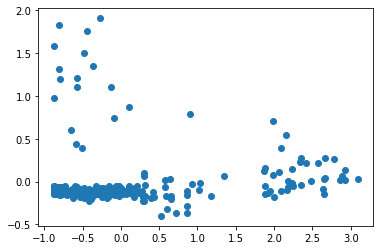

In [32]:
residuals = np.subtract(y_test, y_pred.reshape(-1))

plt.scatter(y_pred, residuals)
plt.show()

# With Keras

In [53]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint

Epoch 1/100
27/27 [==============================] - 1s 27ms/step - loss: 0.3352 - val_loss: 0.1306
Epoch 2/100
27/27 [==============================] - 1s 23ms/step - loss: 0.1828 - val_loss: 0.1242
Epoch 3/100
27/27 [==============================] - 0s 2ms/step - loss: 0.1917 - val_loss: 0.1257
Epoch 4/100
27/27 [==============================] - 0s 2ms/step - loss: 0.1755 - val_loss: 0.1265
Epoch 5/100
27/27 [==============================] - 1s 23ms/step - loss: 0.1829 - val_loss: 0.1225
Epoch 6/100
27/27 [==============================] - 0s 2ms/step - loss: 0.1804 - val_loss: 0.1295
Epoch 7/100
27/27 [==============================] - 0s 2ms/step - loss: 0.1700 - val_loss: 0.1243
Epoch 8/100
27/27 [==============================] - 0s 2ms/step - loss: 0.1701 - val_loss: 0.1249
Epoch 9/100
27/27 [==============================] - 0s 2ms/step - loss: 0.1655 - val_loss: 0.1244
Epoch 10/100
27/27 [==============================] - 0s 2ms/step - loss: 0.1613 - val_loss: 0.1247
Epoch 

<AxesSubplot:>

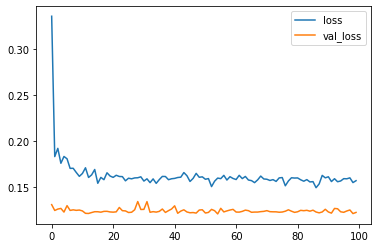

In [54]:
model = Sequential([
    Dense(128, input_dim=x_train.shape[1], activation='relu'),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

save_model = ModelCheckpoint('/work/regresion-lineal_con_scikit-learn', 
                        save_best_only=True,
                    )
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2, callbacks=[save_model])

pd.DataFrame(history.history).plot()

In [55]:
print(model.evaluate(x_test, y_test))
print(f'r2: {metrics.r2_score(y_test, model.predict(x_test)).round(3)}')

9/9 [==============================] - 0s 1ms/step - loss: 0.1352
0.13521187007427216
9/9 [==============================] - 0s 1ms/step
r2: 0.884


9/9 [==============================] - 0s 1ms/step


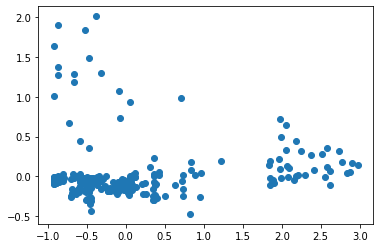

In [56]:
y_pred = model.predict(x_test)

residuals = np.subtract(y_test, y_pred.reshape(-1))

plt.scatter(y_pred, residuals)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fff53006-0184-4848-b826-e5ff712e4edb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>